In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Ensure inline plotting in Jupyter
%matplotlib inline

In [2]:
# Load the data
data = pd.read_csv('d_sih.csv')

In [3]:
# Display the first few rows
data.head()

,Age,Bmi,Drinking,Excercise,Gender,Junk,Sleep,Smoking,Diabetes,Hypertension,Depression,output
0,46,15,1,1,1,2,1,0,88.12,77.05,44.04,2
1,8,34,1,2,0,1,2,0,21.26,45.60,5.35,3
2,63,15,0,3,0,3,1,0,56.64,37.70,49.00,2
3,42,32,0,2,0,2,2,1,42.72,47.40,52.10,1
4,45,30,0,2,1,1,1,1,44.76,20.06,38.68,2


In [4]:

# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           996 non-null    int64  
 1   Bmi           996 non-null    int64  
 2   Drinking      996 non-null    int64  
 3   Excercise     996 non-null    int64  
 4   Gender        996 non-null    int64  
 5   Junk          996 non-null    int64  
 6   Sleep         996 non-null    int64  
 7   Smoking       996 non-null    int64  
 8   Diabetes      996 non-null    float64
 9   Hypertension  996 non-null    float64
 10  Depression    996 non-null    float64
 11  output        996 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 93.5 KB


In [5]:
# Check for missing values
data.isnull().sum()

Age             0
Bmi             0
Drinking        0
Excercise       0
Gender          0
Junk            0
Sleep           0
Smoking         0
Diabetes        0
Hypertension    0
Depression      0
output          0
dtype: int64

In [6]:
# Descriptive statistics
data.describe()

,Age,Bmi,Drinking,Excercise,Gender,Junk,Sleep,Smoking,Diabetes,Hypertension,Depression,output
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,46.425703,24.959839,0.468876,1.998996,0.475904,1.993976,2.006024,0.482932,41.887811,48.727909,47.401717,1.874498
std,25.705395,6.036605,0.499281,0.810111,0.499670,0.827883,0.805736,0.499960,27.373815,30.272018,28.655386,0.887270
min,2.000000,15.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.220000,0.093000,0.080000,1.000000
25%,24.000000,20.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,18.260000,21.593000,24.080000,1.000000
50%,46.000000,25.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000,40.860000,48.951500,47.380000,2.000000
75%,69.000000,30.000000,1.000000,3.000000,1.000000,3.000000,3.000000,1.000000,62.840000,74.435500,67.250000,3.000000
max,90.000000,35.000000,1.000000,3.000000,1.000000,3.000000,3.000000,1.000000,99.480000,99.820000,99.750000,3.000000


<Axes: >

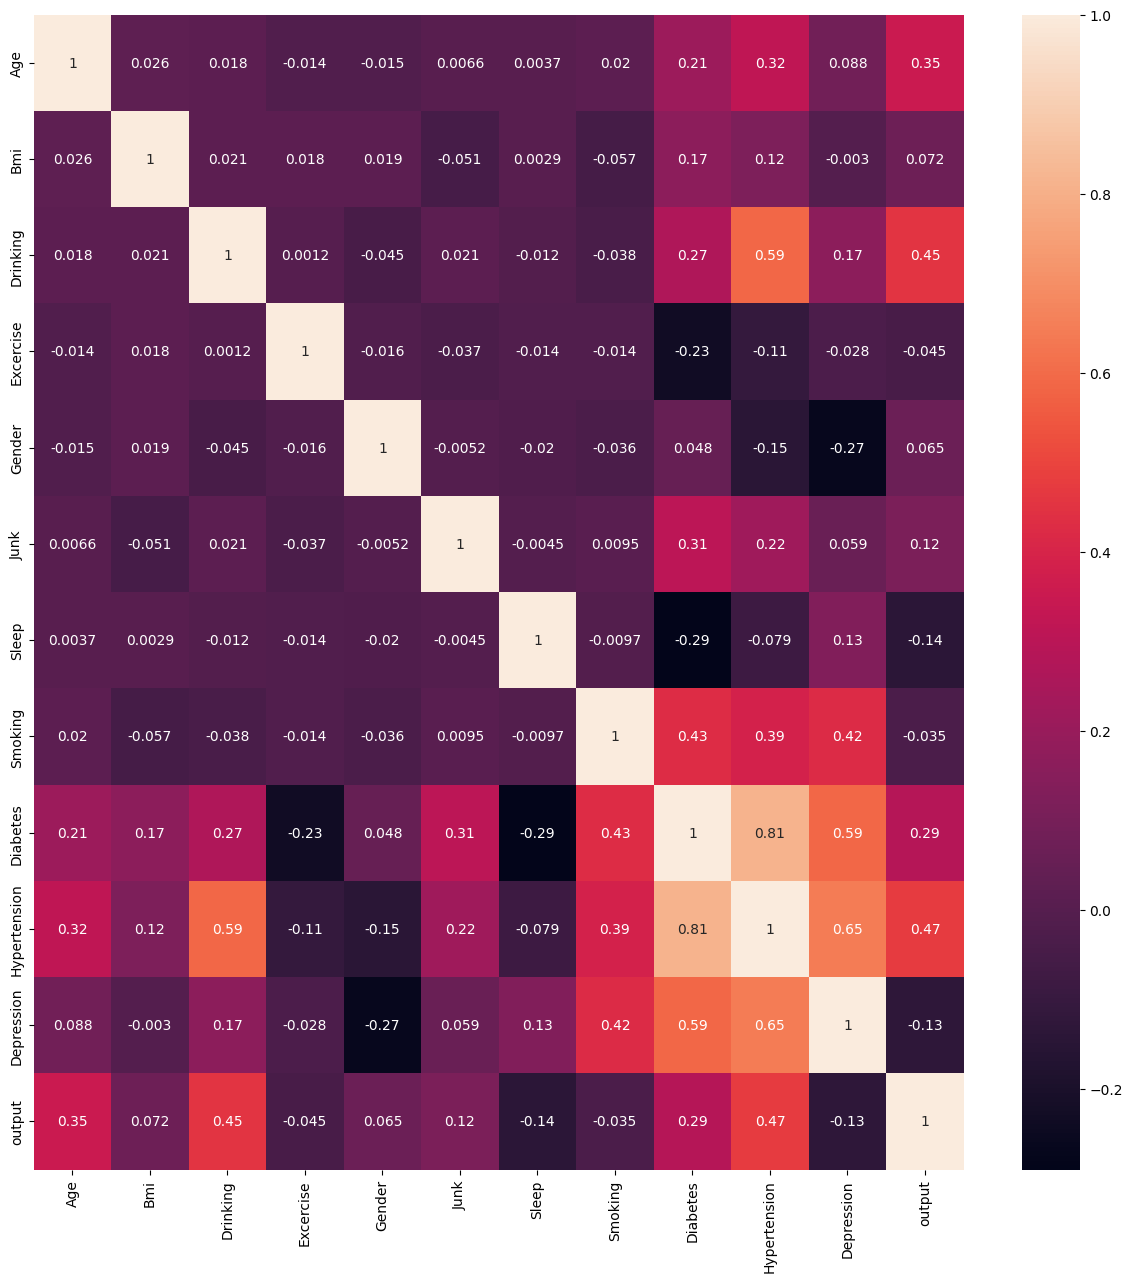

In [7]:
# Correlation heatmap
corr = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True)

<Axes: xlabel='output', ylabel='count'>

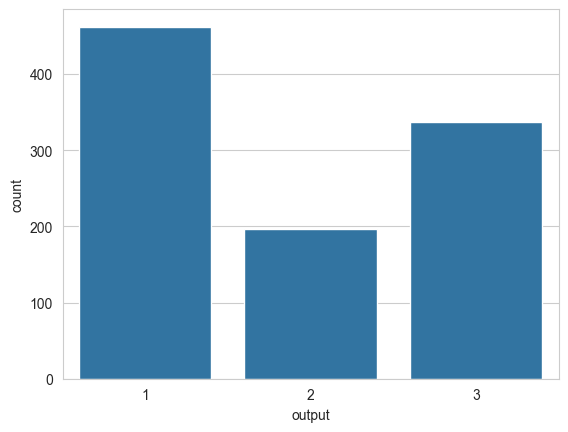

In [8]:
# Countplot for the 'output' column (assuming it's categorical)
sns.set_style('whitegrid')
sns.countplot(x='output', data=data)

In [ ]:
# Prepare data for training
dataset = data.copy()

In [10]:
# Drop the 'output' column as it is the target variable
X = dataset.drop(['output'], axis=1)
y = dataset['output']

In [11]:
# Display column names
X.columns

Index(['Age', 'Bmi', 'Drinking', 'Excercise', 'Gender', 'Junk', 'Sleep',
       'Smoking', 'Diabetes', 'Hypertension', 'Depression'],
      dtype='object')

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Make sure both X_train and X_test have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [14]:
# Initialize and train the RandomForest model
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [15]:
# Make predictions
pred = model.predict(X_test)

In [16]:
# Show first 10 predictions
print(pred[:10])

[1 2 3 3 1 1 3 3 3 1]


In [17]:
# Confusion Matrix
print(confusion_matrix(y_test, pred))

[[80  2  2]
 [ 3 43  3]
 [ 2  4 61]]


In [18]:
# Accuracy of the model
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy of the model is {round(accuracy * 100, 2)}%")

Accuracy of the model is 92.0%


In [19]:
# Save the model as a pickle file
pickle.dump(model, open('model.pkl', 'wb'))